<a href="https://colab.research.google.com/github/apinee/Loan_prediction/blob/main/LOAN_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file

Saving kaggle_2.json to kaggle_2 (1).json


{'kaggle_2 (1).json': b'{"username":"jhaapoorva","key":"410509380d70f33c4322044e56759a84"}'}

In [ ]:
# prompt: write the !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# but for file kaggle_2.json

!mkdir -p ~/.kaggle
!cp kaggle_2.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle_2.json


In [ ]:
# Replace 'dataset-owner/dataset-name' with the specific dataset you need
!kaggle datasets download -d architsharma01/loan-approval-prediction-dataset


Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
License(s): MIT
  0% 0.00/80.6k [00:00<?, ?B/s]
100% 80.6k/80.6k [00:00<00:00, 72.9MB/s]


In [ ]:
import zipfile

# Replace 'dataset.zip' with the actual zip file name
with zipfile.ZipFile('/content/loan-approval-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('loan-approval-prediction-dataset')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
df.shape

(4269, 13)

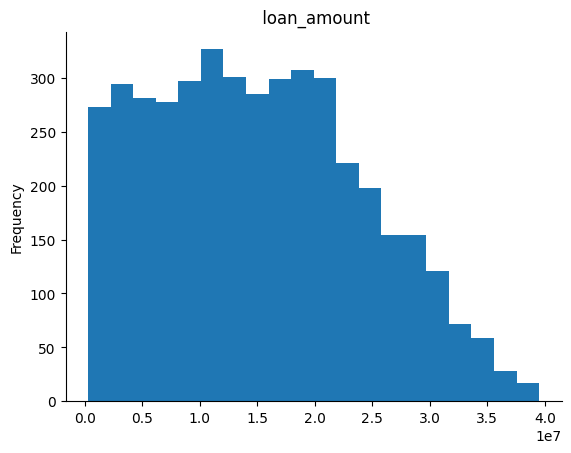

In [ ]:
# @title  loan_amount

from matplotlib import pyplot as plt
df[' loan_amount'].plot(kind='hist', bins=20, title=' loan_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

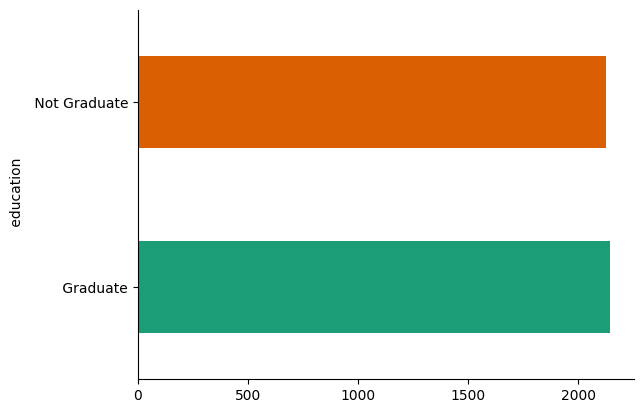

In [ ]:
# @title  education

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby(' education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

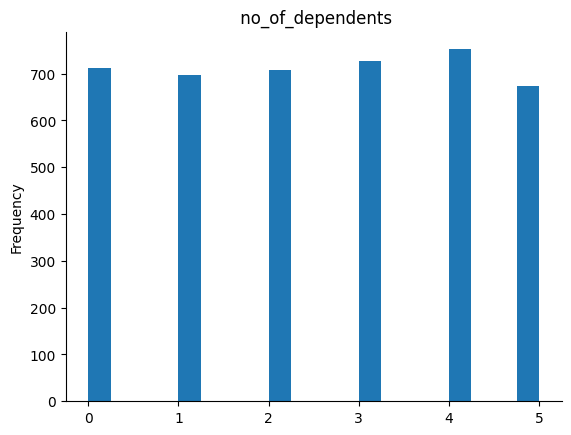

In [ ]:
# @title  no_of_dependents

from matplotlib import pyplot as plt
df[' no_of_dependents'].plot(kind='hist', bins=20, title=' no_of_dependents')
plt.gca().spines[['top', 'right',]].set_visible(False)


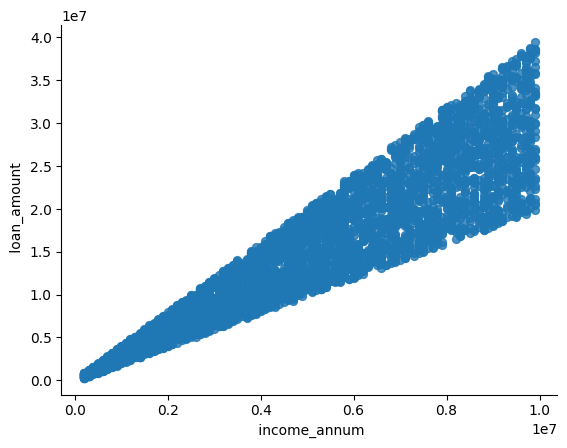

In [ ]:
# @title  income_annum vs  loan_amount

from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' income_annum', y=' loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


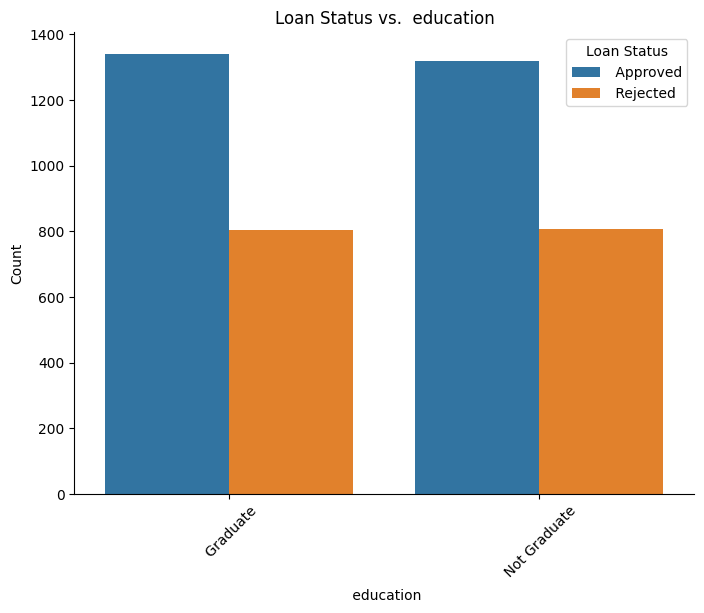

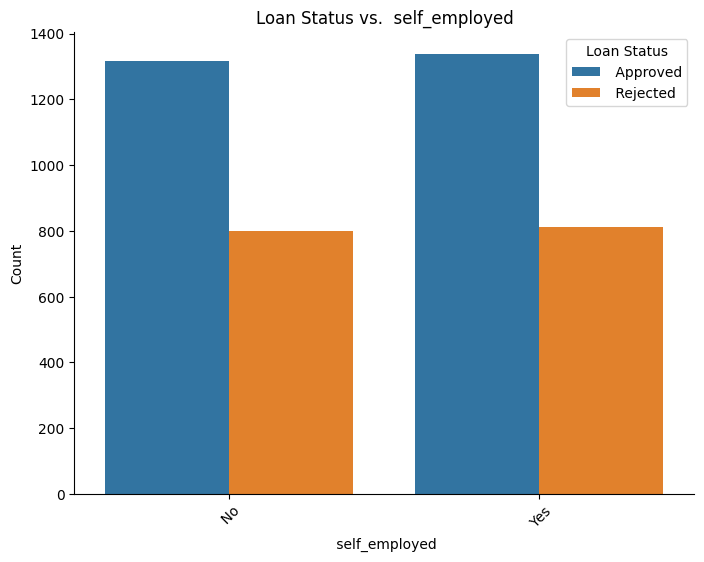

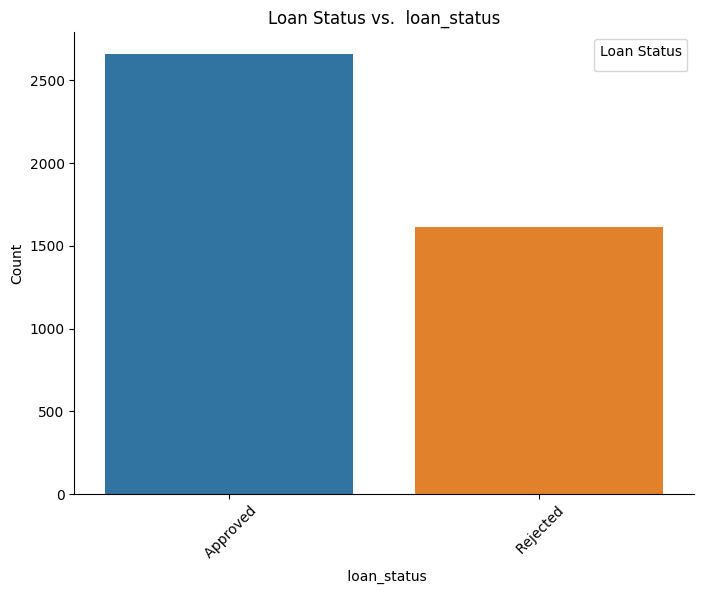

In [ ]:
# prompt: make a bar chart with target variable loan_status and other indepent variable.

# @title loan_status vs other variables

# List of independent variables you want to compare with loan_status
independent_vars = [' education', ' self_employed', ' loan_status']

# Loop through the independent variables and create bar charts
for var in independent_vars:
  if var != 'loan_status':
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue=' loan_status', data=df)
    plt.title(f'Loan Status vs. {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Loan Status')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

In [ ]:
df.shape


(4269, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df=df.drop(["loan_id"],axis=1)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


ENCODING THE FEATURES

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])


In [ ]:

from imblearn.over_sampling import SMOTE

# Check the correct column name
print(df.columns)

# Assuming ' loan_status' (with a space) is the actual target variable name
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)




Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
# Check the class distribution in the target variable
print(y.value_counts())

 loan_status
0    2656
1    1613
Name: count, dtype: int64


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
education,4269.000000,0.497775,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
self_employed,4269.000000,0.503631,0.500045,0.000000,0.000000,1.000000,1.000000,1.000000
income_annum,4269.000000,5059123.916608,2806839.831818,200000.000000,2700000.000000,5100000.000000,7500000.000000,9900000.000000
loan_amount,4269.000000,15133450.456781,9043362.984843,300000.000000,7700000.000000,14500000.000000,21500000.000000,39500000.000000
loan_term,4269.000000,10.900445,5.709187,2.000000,6.000000,10.000000,16.000000,20.000000
cibil_score,4269.000000,599.936051,172.430401,300.000000,453.000000,600.000000,748.000000,900.000000
residential_assets_value,4269.000000,7472616.537831,6503636.587664,-100000.000000,2200000.000000,5600000.000000,11300000.000000,29100000.000000
commercial_assets_value,4269.000000,4973155.305692,4388966.089638,0.000000,1300000.000000,3700000.000000,7600000.000000,19400000.000000
luxury_assets_value,4269.000000,15126305.926446,9103753.665256,300000.000000,7500000.000000,14600000.000000,21700000.000000,39200000.000000


**Data Visulaization**

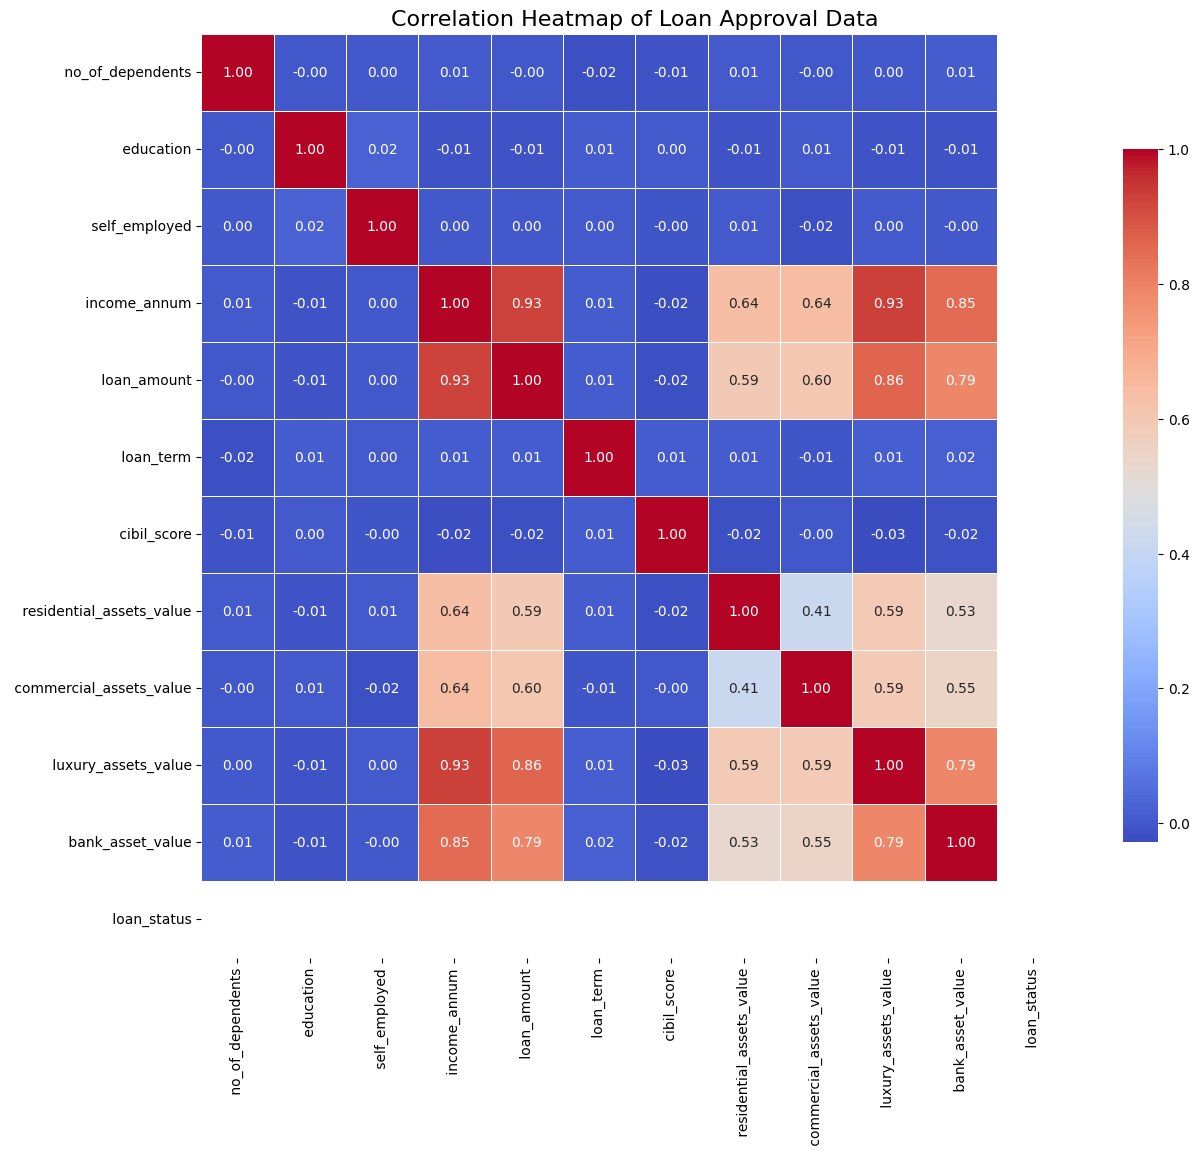

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and loan_status is correctly mapped
df[' loan_status'] = df[' loan_status'].map({'Approved': 0, 'Rejected': 1})

# Ensure all columns are numeric for correlation calculation
# If there are non-numeric columns, you can encode them (e.g., using one-hot encoding or label encoding)
# For simplicity, let's convert all non-numeric columns to categorical types first

# Convert categorical columns to numeric if needed
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create the heatmap
plt.figure(figsize=(14, 12))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})

# Title for the heatmap
plt.title("Correlation Heatmap of Loan Approval Data", fontsize=16)

# Show the plot
plt.show()


#  Chi-Squared test of independence between each feature and the target variable

In [ ]:
# prompt: X_resampled, y_resampled replace with X_train with X_resamples.

from sklearn.model_selection import train_test_split
# Assuming you have X_resampled and y_resampled from SMOTE

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# prompt: chi-squared test of independence
# between the features in the combined train and validation
# sets on the Angus labels for feature selection

import pandas as pd
from scipy.stats import chi2_contingency

# Combine train and validation sets (assuming you have x_train, x_val, y_train, y_val)
# Use X_train and X_test which were defined in cell 24
combined_x = pd.concat([X_train, X_test])
combined_y = pd.concat([y_train, y_test])

# Create a DataFrame with features and target variable
combined_df = pd.concat([combined_x, combined_y], axis=1)

# Perform Chi-squared test for each feature against the target variable
results = {}
for feature in combined_x.columns:
  contingency_table = pd.crosstab(combined_df[feature], combined_df[' loan_status'])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  results[feature] = {'chi2': chi2, 'p-value': p}

# Print the results
for feature, result in results.items():
  print(f"Feature: {feature}")
  print(f"Chi-squared statistic: {result['chi2']}")
  print(f"P-value: {result['p-value']}")
  print("-" * 20)

# You can then use the p-values to select features based on a significance threshold.
# For example, you might select features with a p-value less than 0.05.

Feature:  no_of_dependents
Chi-squared statistic: 32.52272100328612
P-value: 4.680516902412767e-06
--------------------
Feature:  education
Chi-squared statistic: 52.291857680166
P-value: 4.783537473211462e-13
--------------------
Feature:  self_employed
Chi-squared statistic: 43.67588585817276
P-value: 3.875173401307361e-11
--------------------
Feature:  income_annum
Chi-squared statistic: 1249.0453078314813
P-value: 1.0277289249546203e-05
--------------------
Feature:  loan_amount
Chi-squared statistic: 1577.7945585516322
P-value: 0.00012262415098546843
--------------------
Feature:  loan_term
Chi-squared statistic: 766.4033398389487
P-value: 4.453136449124056e-151
--------------------
Feature:  cibil_score
Chi-squared statistic: 4602.289025250635
P-value: 0.0
--------------------
Feature:  residential_assets_value
Chi-squared statistic: 1481.8770515835167
P-value: 7.49241455532174e-05
--------------------
Feature:  commercial_assets_value
Chi-squared statistic: 1413.0395906456429
P-

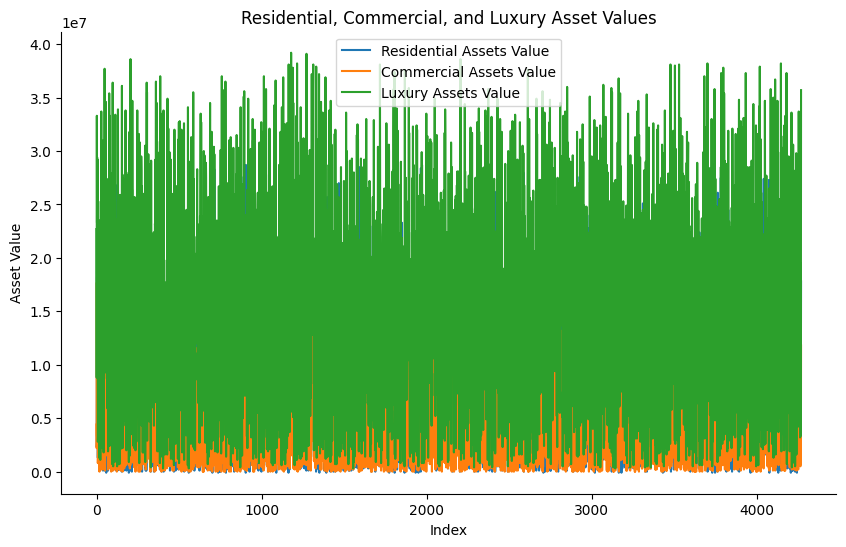

In [ ]:
# prompt: write the code for drawing plot for residential_assets_value, commercial_assets_value ,luxury_assets_value

import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for each asset type
ax.plot(df[' residential_assets_value'], label='Residential Assets Value')
ax.plot(df[' commercial_assets_value'], label='Commercial Assets Value')
ax.plot(df[' luxury_assets_value'], label='Luxury Assets Value')

# Add labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Asset Value')
ax.set_title('Residential, Commercial, and Luxury Asset Values')

# Add a legend
ax.legend()

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


# Data Preparation and Split

In [ ]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Traditional ML methods

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your DataFrame containing the features and target variable
x = df.drop([" loan_status"], axis=1)
y = df[" loan_status"]

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Use the same random_state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Define the logistic regression model with hyperparameter tuning using GridSearchCV
logreg = LogisticRegression()

# Hyperparameter tuning with GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg = grid_search.best_estimator_

# Fit and predict using the best model
best_logreg.fit(x_train, y_train)
regpred = best_logreg.predict(x_test)

# Performance evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, regpred))
print("Accuracy of Logistic Regression is : ", accuracy_score(y_test, regpred) * 100)

# Calculate regression metrics
print("Mean Absolute Error : ", mean_absolute_error(y_test, regpred))
print("Mean Squared Error : ", mean_squared_error(y_test, regpred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, regpred)))
print("R2 Score : ", r2_score(y_test, regpred))  # Still not very useful for classification


ValueError: Input y contains NaN.

In [ ]:
# prompt: make a graph for logistic regression

from sklearn.metrics import roc_curve, auc

# Assuming you have 'y_test' and 'regpred' from the logistic regression model

# Get predicted probabilities for the positive class
y_probs = best_logreg.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: generate a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_test' (true labels) and 'regpred' (predicted labels)
# from your logistic regression model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, regpred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Approved', 'Rejected'],
            yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': regpred})

# Display the DataFrame
df_results

**Decision Tree**

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

In [ ]:
# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': dtreepred})

# Display the DataFrame
df_results

In [ ]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

In [ ]:
# prompt: make a confussion matrix of the same.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_test' and 'regpred' from your logistic regression model
# or 'y_test' and 'dtreepred' from your decision tree model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, regpred)  # Replace 'regpred' with 'dtreepred' for decision tree

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Random Forest**

In [ ]:
# prompt: do random forest

import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, rf_predictions))
print("Accuracy of Random Forest is:", accuracy_score(y_test, rf_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("R2 Score:", r2_score(y_test, rf_predictions))


In [ ]:
# prompt: generate a confusion for random forest classifier

# Assuming you have 'y_test' and 'rf_predictions' from your Random Forest model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Display the DataFrame
df_results

KNN

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(x_test_scaled)

# Evaluate the model
print(classification_report(y_test, knn_predictions))
print("Accuracy of KNN is:", accuracy_score(y_test, knn_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("R2 Score:", r2_score(y_test, knn_predictions))


Ensemmble method



In [ ]:
# prompt: Generate with Ensemmble method

import numpy as np
from sklearn.ensemble import VotingClassifier

# Assuming you have already trained your individual models (Logistic Regression, Decision Tree, Random Forest, KNN)

# Create a voting classifier with your models
voting_classifier = VotingClassifier(estimators=[
    ('lr', logreg),  # Logistic Regression
    ('dt', dtree),  # Decision Tree
    ('rf', rf_classifier),  # Random Forest
    ('knn', knn_classifier)  # KNN
], voting='hard')  # You can choose 'hard' or 'soft' voting

# Train the voting classifier
voting_classifier.fit(x_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(x_test)

# Evaluate the ensemble model
print(classification_report(y_test, voting_predictions))
print("Accuracy of Ensemble Model (Voting Classifier) is:", accuracy_score(y_test, voting_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, voting_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, voting_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, voting_predictions)))
print("R2 Score:", r2_score(y_test, voting_predictions))


**Support Vector Machine**

**Kernal=linear**

In [ ]:


from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)  # You can choose different kernels (linear, rbf, poly) and C values

# Train the model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_predictions))
print("Accuracy of SVM is:", accuracy_score(y_test, svm_predictions) * 100)

print("Mean Absolute Error:", mean_absolute_error(y_test, svm_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_predictions)))
print("R2 Score:", r2_score(y_test, svm_predictions))



**Kernal=polynomial**

In [ ]:
# prompt: Generate the code for SVM when the kernal is polynimial

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, C=1)  # You can adjust degree and C

# Train the model
svm_poly_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_poly_predictions = svm_poly_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_poly_predictions))
print("Accuracy of SVM with polynomial kernel is:", accuracy_score(y_test, svm_poly_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_poly_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_poly_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_poly_predictions)))
print("R2 Score:", r2_score(y_test, svm_poly_predictions))

In [ ]:
# prompt: Generate the code for SVM when the kernal is polynimial

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, C=2)  # You can adjust degree and C

# Train the model
svm_poly_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_poly_predictions = svm_poly_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_poly_predictions))
print("Accuracy of SVM with polynomial kernel is:", accuracy_score(y_test, svm_poly_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_poly_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_poly_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_poly_predictions)))
print("R2 Score:", r2_score(y_test, svm_poly_predictions))

In [ ]:
# prompt: Generate the code for SVM when the kernal is polynimial

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, C=3)  # You can adjust degree and C

# Train the model
svm_poly_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_poly_predictions = svm_poly_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_poly_predictions))
print("Accuracy of SVM with polynomial kernel is:", accuracy_score(y_test, svm_poly_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_poly_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_poly_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_poly_predictions)))
print("R2 Score:", r2_score(y_test, svm_poly_predictions))

In [ ]:
# prompt: Generate the code for SVM when the kernal is polynimial

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, C=4)  # You can adjust degree and C

# Train the model
svm_poly_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_poly_predictions = svm_poly_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_poly_predictions))
print("Accuracy of SVM with polynomial kernel is:", accuracy_score(y_test, svm_poly_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_poly_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_poly_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_poly_predictions)))
print("R2 Score:", r2_score(y_test, svm_poly_predictions))

In [ ]:
# prompt: Generate the code for SVM when the kernal is polynimial

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, C=5)  # You can adjust degree and C

# Train the model
svm_poly_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_poly_predictions = svm_poly_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_poly_predictions))
print("Accuracy of SVM with polynomial kernel is:", accuracy_score(y_test, svm_poly_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_poly_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_poly_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_poly_predictions)))
print("R2 Score:", r2_score(y_test, svm_poly_predictions))

# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': svm_poly_predictions})

# Display the DataFrame
df_results

In [ ]:
# prompt: Generate a confusion for svm polynomial kernal c=5

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'y_test' and 'svm_poly_predictions' from your SVM with polynomial kernel model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_poly_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM with Polynomial Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# prompt: Generate the code for SVM for Gaussian kernal.

# SVM with Gaussian (RBF) Kernel

# Create an SVM classifier with an RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', C=1, gamma='scale')  # You can adjust C and gamma

# Train the model
svm_rbf_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_rbf_predictions = svm_rbf_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, svm_rbf_predictions))
print("Accuracy of SVM with RBF kernel is:", accuracy_score(y_test, svm_rbf_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_rbf_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, svm_rbf_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, svm_rbf_predictions)))
print("R2 Score:", r2_score(y_test, svm_rbf_predictions))

In [ ]:
# prompt: Generate the graph of SVM with polynimal kernal with c=1,2,3,4,5. Take the axis as Accuracy and R2\

# Assuming you have already calculated accuracy and R2 scores for different C values
c_values = [1, 2, 3, 4, 5]
accuracies = [91.803,92.74, 93.67, 93.67, 93.91]  # Replace with your actual accuracy scores
r2_scores = [0.64, 0.68, 0.72, 0.72, 0.73]  # Replace with your actual R2 scores


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(c_values, accuracies, marker='o', label='Accuracy')
plt.plot(c_values, r2_scores, marker='o', label='R2 Score')

plt.xlabel('C Value')
plt.ylabel('Performance')
plt.title('SVM with Polynomial Kernel: Accuracy and R2 Score vs. C')
plt.legend()
plt.grid(True)
plt.show()

**Ridge regression**

In [ ]:
# prompt: predict the data using ridge regression with accuracy

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value

# Train the model
ridge_model.fit(x_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(x_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, ridge_predictions))
print("R2 Score:", r2_score(y_test, ridge_predictions))



In [ ]:
# prompt: Make a table with the accuracy of all the models

from tabulate import tabulate

data = [
    ["Logistic Regression", accuracy_score(y_test, regpred) * 100],
    ["Decision Tree", accuracy_score(y_test, dtreepred) * 100],
    ["Random Forest", accuracy_score(y_test, rf_predictions) * 100],
    ["KNN", accuracy_score(y_test, knn_predictions) * 100],
    ["Neural Network", accuracy_score(y_test, y_pred_nn) * 100],
    ["Ensemble Model", accuracy_score(y_test, voting_predictions) * 100]
]

headers = ["Model", "Accuracy (%)"]

table = tabulate(data, headers, tablefmt="grid")
print(table)


**XGBooste, Ada Booste, Cat Booste**

**XGBooste**

In [ ]:
# prompt: Use the XGBooste algorithm on this

from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, xgb_predictions))
print("Accuracy of XGBoost is:", accuracy_score(y_test, xgb_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, xgb_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, xgb_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, xgb_predictions)))
print("R2 Score:", r2_score(y_test, xgb_predictions))

# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions })

# Display the DataFrame
df_results



**Ada Booste**

In [ ]:
# prompt: Predict using Ada Booste

from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
ada_classifier.fit(x_train, y_train)

# Make predictions on the test set
ada_predictions = ada_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, ada_predictions))
print("Accuracy of AdaBoost is:", accuracy_score(y_test, ada_predictions) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, ada_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, ada_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ada_predictions)))
print("R2 Score:", r2_score(y_test, ada_predictions))


# prompt: take y_test and turn into df. Show the actual and predicted value of y_test

# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': ada_predictions })

# Display the DataFrame
df_results



**Improving the efficiency of NN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

# Evaluate the model
print(classification_report(y_test, y_pred_nn))
print("Accuracy of Neural Network is:", accuracy_score(y_test, y_pred_nn) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_nn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2 Score:", r2_score(y_test, y_pred_nn))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the improved model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Correct activation
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

# Evaluate the predictions
print(classification_report(y_test, y_pred_nn))
print("Accuracy of Neural Network is:", accuracy_score(y_test, y_pred_nn) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_nn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2 Score:", r2_score(y_test, y_pred_nn))


The results and comparison from the two implementations demonstrate that **increasing the number of neurons, adding regularization layers (BatchNormalization, Dropout), and improving the training strategy (e.g., using early stopping)** significantly enhance the model's performance.

---

### **Comparison of the Two Models**

| Metric                   | Initial Model                          | Improved Model                         | Change |
|--------------------------|-----------------------------------------|----------------------------------------|--------|
| **Accuracy**             | 92.97%                                 | 97.07%                                | **+4.1%** |
| **Mean Absolute Error**  | 0.0703                                 | 0.0293                                | **Decreased** |
| **Mean Squared Error**   | 0.0703                                 | 0.0293                                | **Decreased** |
| **Root Mean Squared Error** | 0.2651                              | 0.1711                                | **Decreased** |
| **R² Score**             | 0.6994                                 | 0.8747                                | **Improved by 0.175** |

---

### **Key Observations**

1. **Effect of Increasing Neurons**:
   - The improved model has more neurons in the layers (**128 and 64** compared to **64 and 32** in the initial model).
   - This increase improves the model's capacity to capture complex patterns in the data, resulting in higher accuracy and better error metrics.

2. **Regularization Layers**:
   - Adding **BatchNormalization** helps stabilize learning by normalizing layer outputs.
   - **Dropout** reduces overfitting by randomly deactivating neurons during training, enabling better generalization.

3. **Learning Strategy**:
   - **Early Stopping** in the improved model prevents overfitting by halting training when performance stops improving, leading to better test accuracy and error metrics.

4. **Improved Metrics**:
   - The **accuracy improvement (92.97% → 97.07%)** shows the improved model's better ability to predict correctly.
   - The significant decrease in **MSE and RMSE** indicates fewer large errors in predictions.
   - The increase in the **R² score (0.699 → 0.875)** shows the improved model can explain more variance in the target variable.

---

### **Conclusion**
- **Increasing the number of neurons**, along with **regularization layers** and a more robust training strategy, significantly improves the performance of the neural network.
- **Larger models** (with appropriate regularization) are better at capturing complex relationships in the data, leading to higher accuracy and better error metrics.
- However, it’s essential to balance model size with the available data to avoid overfitting, especially with smaller datasets.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the improved model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='tanh')  # Correct activation
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

# Evaluate the predictions
print(classification_report(y_test, y_pred_nn))
print("Accuracy of Neural Network is:", accuracy_score(y_test, y_pred_nn) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_nn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2 Score:", r2_score(y_test, y_pred_nn))
